In [1]:
from DeepPurpose import utils, dataset
from DeepPurpose import DTI as models
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import torchvision
from rdkit import Chem

In [2]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="4"

In [3]:
data = pd.read_csv('/home/aiman/deep_learning/deeplearning.csv')
data

,drugs,target,score,Unnamed: 3
0,CC/C(=N\N=C(\N)S)c1ccc(Cl)c(Cl)c1,APAAVDWRARGAVTAVKDQGQCGSCWAFSAIGNVECQWFLAGHPLT...,7.70,CHEMBL1135476
1,CC/C(=N\N=C(\N)S)c1cc(C(F)(F)F)cc(C(F)(F)F)c1,APAAVDWRARGAVTAVKDQGQCGSCWAFSAIGNVECQWFLAGHPLT...,7.70,CHEMBL1135476
2,CC1CN(C(=N)S)N=C1c1cccc(C(F)(F)F)c1,APAAVDWRARGAVTAVKDQGQCGSCWAFSAIGNVECQWFLAGHPLT...,7.40,CHEMBL1135476
3,CC/C(=N\N=C(\N)S)c1cccc(C(F)(F)F)c1,APAAVDWRARGAVTAVKDQGQCGSCWAFSAIGNVECQWFLAGHPLT...,7.30,CHEMBL1135476
4,NC(=S)N1CCC(c2ccc(Cl)c(Cl)c2)=N1,APAAVDWRARGAVTAVKDQGQCGSCWAFSAIGNVECQWFLAGHPLT...,7.22,CHEMBL1135476
...,...,...,...,...
199,COC1=CC(=O)N(C(=O)/C=C/[C@H](C)NC(=O)[C@H](CCc...,APAAVDWRARGAVTAVKDQGQCGSCWAFSAIGNVECQWFLAGHPLT...,8.94,CHEMBL5154751
200,COC1=CC(=O)N(C(=O)/C=C/[C@H](C)NC(=O)[C@H](CC2...,APAAVDWRARGAVTAVKDQGQCGSCWAFSAIGNVECQWFLAGHPLT...,8.87,CHEMBL5154751
201,COC1=CC(=O)N(C(=O)/C=C/[C@H](CCc2ccccc2)NC(=O)...,APAAVDWRARGAVTAVKDQGQCGSCWAFSAIGNVECQWFLAGHPLT...,8.81,CHEMBL5154751
202,COC1=CC(=O)N(C(=O)/C=C/[C@H](C)NC(=O)[C@H](CC2...,APAAVDWRARGAVTAVKDQGQCGSCWAFSAIGNVECQWFLAGHPLT...,8.30,CHEMBL5154751


In [4]:
X_drugs = data["drugs"]
X_targets = data["target"]
y = data["score"]

In [5]:
print('Drug 1: ' + X_drugs[0])
print('Target 1: ' + X_targets[0])
print('Score 1: ' + str(y[0]))

Drug 1: CC/C(=N\N=C(\N)S)c1ccc(Cl)c(Cl)c1
Target 1: APAAVDWRARGAVTAVKDQGQCGSCWAFSAIGNVECQWFLAGHPLTNLAEQMLVSCDKTDSGCSGGLMNNAFEWIVQENNGAVYTEDSYPYASGEGISPPCTTSGHTVGATITGHVELPQDEAQIAAWLAVNGPVAVAVDASSWMTYTGGVMTSCVSEQLDHGVLLVGYNDGAAVPYWIIKNSWTTQWGEEGYIRIAKGSNQCLVKEEASSAVVGHHHHHH
Score 1: 7.7


In [6]:
drug_encoding, target_encoding = 'MPNN', 'CNN'
#drug_encoding, target_encoding = 'Morgan', 'Conjoint_triad'

In [7]:
train, val, test = utils.data_process(X_drugs, X_targets, y, 
                                drug_encoding, target_encoding, 
                                split_method='random',frac=[0.7,0.1,0.2],
                                random_seed = 1)

Drug Target Interaction Prediction Mode...
in total: 204 drug-target pairs
encoding drug...
unique drugs: 204
encoding protein...
unique target sequence: 1
splitting dataset...
Done.


In [8]:
config = utils.generate_config(drug_encoding = drug_encoding, 
                         target_encoding = target_encoding, 
                         cls_hidden_dims = [1024,1024,512], 
                         train_epoch = 400, 
                         LR = 0.001, 
                         batch_size = 126,
                         hidden_dim_drug = 128,
                         mpnn_hidden_size = 128,
                         mpnn_depth = 3, 
                         cnn_target_filters = [32,64,96],
                         cnn_target_kernels = [4,8,12]
                        )

In [9]:
model = models.model_initialize(**config)


Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 59.9919. Total time 0.00027 hours
Validation at Epoch 1 with loss:39.3268, MSE: 39.3268 , Pearson Correlation: -0.2419 with p-value: 3.04E-01 , Concordance Index: 0.45989
Training at Epoch 2 iteration 0 with loss 45.4140. Total time 0.00055 hours
Validation at Epoch 2 with loss:2.50339, MSE: 2.50339 , Pearson Correlation: 0.07279 with p-value: 7.60E-01 , Concordance Index: 0.54545
Training at Epoch 3 iteration 0 with loss 2.75932. Total time 0.00055 hours
Validation at Epoch 3 with loss:9.40473, MSE: 9.40473 , Pearson Correlation: -0.3063 with p-value: 1.89E-01 , Concordance Index: 0.45989
Training at Epoch 4 iteration 0 with loss 7.55394. Total time 0.00083 hours
Validation at Epoch 4 with loss:7.07973, MSE: 7.07973 , Pearson Correlation: 0.29194 with p-value: 2.12E-01 , Concordance Index: 0.63636
Training at Epoch 5 iteration 0 with loss 10.9298. Total time 0.00083 hours
Valida

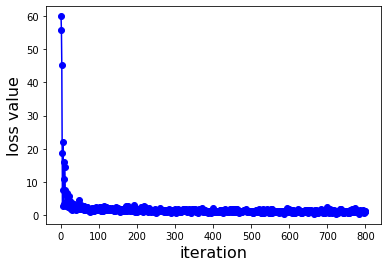

In [10]:
model.train(train, val, test)

In [11]:
def save_model(self, path_dir):
    if not os.path.exists(path_dir):
        os.makedirs(path_dir)
        torch.save(self.model.state_dict(), path_dir + '/model.pt')
        save_dict(path_dir, self.config)

In [12]:
data1= pd.read_csv('/home/aiman/deep_learning/Protein.csv')
data1

,Target_Name,Sequence
0,Tripanosoma_cruzi,APAAVDWRARGAVTAVKDQGQCGSCWAFSAIGNVECQWFLAGHPLT...


In [13]:
t_name = data1["Target_Name"]
t = data1["Sequence"]

In [14]:
print('Target_Name: ' + t_name)
print('Sequence: '+ t)

0    Target_Name: Tripanosoma_cruzi
Name: Target_Name, dtype: object
0    Sequence: APAAVDWRARGAVTAVKDQGQCGSCWAFSAIGNVEC...
Name: Sequence, dtype: object


In [15]:
drug_data = pd.read_csv('cans_canonical.csv')

In [16]:
r_name= drug_data["Name"]
r = drug_data["Canonical Smiles"]
drugbank_ID = drug_data["drugbank_id"]
print('Repurposing Drug 1 Name: ' + r_name[0])
print('Repurposing Drug 1 Smiles: ' + r[0])
print('Repurposing Drug 1 drugbank_ID: ' + str(drugbank_ID[0]))

Repurposing Drug 1 Name: (-)-Gossypol
Repurposing Drug 1 Smiles: Cc1cc2c(C(C)C)c(O)c(O)c(C=O)c2c(O)c1-c1c(C)cc2c(C(C)C)c(O)c(O)c(C=O)c2c1O
Repurposing Drug 1 drugbank_ID: DB17379


In [17]:
'''y_pred = models.repurpose(X_repurpose = r, target = t, model = model, drug_names = r_name, target_name = t_name, 
                          result_folder = "./result/", convert_y = True)'''

'y_pred = models.repurpose(X_repurpose = r, target = t, model = model, drug_names = r_name, target_name = t_name, \n                          result_folder = "./result/", convert_y = True)'

In [18]:
X_drugs = data["drugs"]
X_targets = data["target"]
y = data["score"]

In [19]:
protein_data= pd.read_csv('protein_data.csv')

In [20]:
t_name = protein_data["name"]
t = protein_data["amino_acid_sequence"]

In [21]:
y_pred = models.virtual_screening(X_repurpose = r, target = t, model = model, drug_names = r_name, target_names = t_name)

virtual screening...
Drug Target Interaction Prediction Mode...
in total: 4837 drug-target pairs
encoding drug...
unique drugs: 4713
encoding protein...
unique target sequence: 4659
Done.
predicting...
---------------
Virtual Screening Result
+------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------+---------------+
| Rank |                                                                                                             Drug Name                                                                                                              |                                                     Target Name                                                     | Binding Score |
+------+-----

In [22]:
import csv

# Specify input and output file names
input_file = '/home/aiman/DeepPurpose/result/virtual_screening.txt'
output_file = 'virtual_screening.csv'

# Read data from the input .txt file
with open(input_file, 'r') as txt_file:
    lines = txt_file.readlines()

# Process and convert the data
csv_data = []
for line in lines:
    parts = line.strip().split()  # Split line by spaces
    csv_data.append(parts)

# Write data to the output .csv file
with open(output_file, 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerows(csv_data)

print(f'{input_file} has been converted and saved as {output_file}')


/home/aiman/DeepPurpose/result/virtual_screening.txt has been converted and saved as virtual_screening.csv


In [23]:
# Specify input and output file names
input_file = '/home/aiman/DeepPurpose/result/virtual_screening.txt'

# Read data from the input .txt file
with open(input_file, 'r') as txt_file:
    lines = txt_file.readlines()

In [24]:
lines[5]

'|  3   |                                                                                                            Chloride ion                                                                                                            |                                             Chromobox protein homolog 5                                             |     11.11     |\n'

In [18]:
import pandas as pd
data=pd.read_csv('/home/aiman/DeepPurpose/result/output.csv')

In [19]:
data

,0,1,2,3
0,1,Cobalt hexammine ion,Retinol-binding protein 3,13.25
1,2,Ammonium chloride,Cathepsin L1,12.63
2,3,Chloride ion,Chromobox protein homolog 5,11.11
3,4,Calcium carbimide,Phenylalanine--tRNA ligase alpha subunit,10.69
4,5,Chromic chloride,Calcium-dependent secretion activator 2,9.95
...,...,...,...,...
4832,4833,(S)-4-bromo-3-hydroxy-3-methylbutyl diphosphate,15-hydroxyprostaglandin dehydrogenase [NAD(+)],4.10
4833,4834,Arsenic trioxide,2-isopropylmalate synthase,4.08
4834,4835,Clodronic acid,Aspartate carbamoyltransferase,4.05
4835,4836,Coenzyme M,STE20/SPS1-related proline-alanine-rich protei...,4.02


In [26]:
new_data = data.loc[data['3'] >= 7.5]

In [27]:
new_data

,0,1,2,3
0,1,Cobalt hexammine ion,Retinol-binding protein 3,13.25
1,2,Ammonium chloride,Cathepsin L1,12.63
2,3,Chloride ion,Chromobox protein homolog 5,11.11
3,4,Calcium carbimide,Phenylalanine--tRNA ligase alpha subunit,10.69
4,5,Chromic chloride,Calcium-dependent secretion activator 2,9.95
...,...,...,...,...
335,336,Cyclo(his-pro),cGMP-dependent protein kinase 2,7.50
336,337,"6-(4-{(1S,2S)-2-AMINO-1-[(DIMETHYLAMINO)CARBON...",Orf protein,7.50
337,338,Colistin,Serine/threonine-protein kinase tousled-like 2,7.50
338,339,"2-Amino-N,3,3-Trimethylbutanamide",Protein S100-A13,7.50


In [28]:
drug_data = pd.read_csv('cans_canonical.csv')

In [29]:
drug_data

,Name,drugbank_id,Canonical Smiles
0,(-)-Gossypol,DB17379,Cc1cc2c(C(C)C)c(O)c(O)c(C=O)c2c(O)c1-c1c(C)cc2...
1,(-)-menthol 1-propylene glycol carbonate,DB14136,CC(O)COC(=O)OC1CC(C)CCC1C(C)C
2,"({[(3E)-2'-Oxo-2',7'-dihydro-2,3'-biindol-3(7H...",DB07949,O=C(O)CON=C1C2=CC=CCC2=NC1=C1C(=O)N=C2CC=CC=C21
3,({3-[1-(4-Hydroxy-2-oxo-2H-chromen-3-yl)-propy...,DB08664,CCC(c1cccc(NC(=O)CNC(=O)OC(C)(C)C)c1)c1c(O)c2c...
4,(+)-1-bromo-2-propanol,DB03335,CC(O)CBr
...,...,...,...
11531,Zuclopenthixol,DB01624,OCCN1CCN(CCC=C2c3ccccc3Sc3ccc(Cl)cc32)CC1
11532,Zuranolone,DB15490,CC1(O)CCC2C(CCC3C2CCC2(C)C(C(=O)Cn4cc(C#N)cn4)...
11533,Zuretinol acetate,DB12112,CC(=O)OCC=C(C)C=CC=C(C)C=CC1=C(C)CCCC1(C)C
11534,Z-Val-Ala-Asp fluoromethyl ketone,DB07744,CC(NC(=O)C(NC(=O)OCc1ccccc1)C(C)C)C(=O)NC(CC(=...


In [17]:
drug_data['Name']

0                                             (-)-Gossypol
1                 (-)-menthol 1-propylene glycol carbonate
2        ({[(3E)-2'-Oxo-2',7'-dihydro-2,3'-biindol-3(7H...
3        ({3-[1-(4-Hydroxy-2-oxo-2H-chromen-3-yl)-propy...
4                                   (+)-1-bromo-2-propanol
                               ...                        
11531                                       Zuclopenthixol
11532                                           Zuranolone
11533                                    Zuretinol acetate
11534                    Z-Val-Ala-Asp fluoromethyl ketone
11535                                               Zytron
Name: Name, Length: 11536, dtype: object

In [39]:
import pandas as pd



# Merge DataFrames based on the 'ID' column
merged_df = pd.merge(new_data, drug_data, left_on='1', right_on='Name')

# Create a list of values where 'Value1' and 'Value2' are equal
#equal_values = merged_df[merged_df['Value1'] == merged_df['Value2']]['Value1'].tolist()

# Print the list of equal values
#print(equal_values)


In [40]:
merged_df

,0,1,2,3,Name,drugbank_id,Canonical Smiles
0,1,Cobalt hexammine ion,Retinol-binding protein 3,13.25,Cobalt hexammine ion,DB03350,[NH3+][Co-3]([NH3+])([NH3+])([NH3+])([NH3+])[N...
1,2,Ammonium chloride,Cathepsin L1,12.63,Ammonium chloride,DB06767,[Cl-].[NH4+]
2,3,Chloride ion,Chromobox protein homolog 5,11.11,Chloride ion,DB14547,[Cl-]
3,4,Calcium carbimide,Phenylalanine--tRNA ligase alpha subunit,10.69,Calcium carbimide,DB09116,[Ca+2].[N-]=C=[N-]
4,5,Chromic chloride,Calcium-dependent secretion activator 2,9.95,Chromic chloride,DB09129,[Cl-].[Cl-].[Cl-].[Cr+3]
...,...,...,...,...,...,...,...
335,336,Cyclo(his-pro),cGMP-dependent protein kinase 2,7.50,Cyclo(his-pro),DB02414,O=C1NC(Cc2cnc[nH]2)C(=O)N2CCCC12
336,337,"6-(4-{(1S,2S)-2-AMINO-1-[(DIMETHYLAMINO)CARBON...",Orf protein,7.50,"6-(4-{(1S,2S)-2-AMINO-1-[(DIMETHYLAMINO)CARBON...",DB08504,CN(C)C(=O)C(c1ccc(-c2ccc3ncnn3c2)cc1)C(N)C(=O)...
337,338,Colistin,Serine/threonine-protein kinase tousled-like 2,7.50,Colistin,DB00803,CCC(C)CCCC(=O)NC(CCN)C(=O)NC(C(=O)NC(CCN)C(=O)...
338,339,"2-Amino-N,3,3-Trimethylbutanamide",Protein S100-A13,7.50,"2-Amino-N,3,3-Trimethylbutanamide",DB01949,CNC(=O)C(N)C(C)(C)C


In [41]:
merged_df= merged_df.rename(columns={'2':'Protein_name','3':'Binding_score'})

In [42]:
merged_df

,0,1,Protein_name,Binding_score,Name,drugbank_id,Canonical Smiles
0,1,Cobalt hexammine ion,Retinol-binding protein 3,13.25,Cobalt hexammine ion,DB03350,[NH3+][Co-3]([NH3+])([NH3+])([NH3+])([NH3+])[N...
1,2,Ammonium chloride,Cathepsin L1,12.63,Ammonium chloride,DB06767,[Cl-].[NH4+]
2,3,Chloride ion,Chromobox protein homolog 5,11.11,Chloride ion,DB14547,[Cl-]
3,4,Calcium carbimide,Phenylalanine--tRNA ligase alpha subunit,10.69,Calcium carbimide,DB09116,[Ca+2].[N-]=C=[N-]
4,5,Chromic chloride,Calcium-dependent secretion activator 2,9.95,Chromic chloride,DB09129,[Cl-].[Cl-].[Cl-].[Cr+3]
...,...,...,...,...,...,...,...
335,336,Cyclo(his-pro),cGMP-dependent protein kinase 2,7.50,Cyclo(his-pro),DB02414,O=C1NC(Cc2cnc[nH]2)C(=O)N2CCCC12
336,337,"6-(4-{(1S,2S)-2-AMINO-1-[(DIMETHYLAMINO)CARBON...",Orf protein,7.50,"6-(4-{(1S,2S)-2-AMINO-1-[(DIMETHYLAMINO)CARBON...",DB08504,CN(C)C(=O)C(c1ccc(-c2ccc3ncnn3c2)cc1)C(N)C(=O)...
337,338,Colistin,Serine/threonine-protein kinase tousled-like 2,7.50,Colistin,DB00803,CCC(C)CCCC(=O)NC(CCN)C(=O)NC(C(=O)NC(CCN)C(=O)...
338,339,"2-Amino-N,3,3-Trimethylbutanamide",Protein S100-A13,7.50,"2-Amino-N,3,3-Trimethylbutanamide",DB01949,CNC(=O)C(N)C(C)(C)C


In [43]:
 final_data= merged_df.loc[:,['drugbank_id','Name','Protein_name','Canonical Smiles','Binding_score']]

In [44]:
final_data

,drugbank_id,Name,Protein_name,Canonical Smiles,Binding_score
0,DB03350,Cobalt hexammine ion,Retinol-binding protein 3,[NH3+][Co-3]([NH3+])([NH3+])([NH3+])([NH3+])[N...,13.25
1,DB06767,Ammonium chloride,Cathepsin L1,[Cl-].[NH4+],12.63
2,DB14547,Chloride ion,Chromobox protein homolog 5,[Cl-],11.11
3,DB09116,Calcium carbimide,Phenylalanine--tRNA ligase alpha subunit,[Ca+2].[N-]=C=[N-],10.69
4,DB09129,Chromic chloride,Calcium-dependent secretion activator 2,[Cl-].[Cl-].[Cl-].[Cr+3],9.95
...,...,...,...,...,...
335,DB02414,Cyclo(his-pro),cGMP-dependent protein kinase 2,O=C1NC(Cc2cnc[nH]2)C(=O)N2CCCC12,7.50
336,DB08504,"6-(4-{(1S,2S)-2-AMINO-1-[(DIMETHYLAMINO)CARBON...",Orf protein,CN(C)C(=O)C(c1ccc(-c2ccc3ncnn3c2)cc1)C(N)C(=O)...,7.50
337,DB00803,Colistin,Serine/threonine-protein kinase tousled-like 2,CCC(C)CCCC(=O)NC(CCN)C(=O)NC(C(=O)NC(CCN)C(=O)...,7.50
338,DB01949,"2-Amino-N,3,3-Trimethylbutanamide",Protein S100-A13,CNC(=O)C(N)C(C)(C)C,7.50


In [46]:
final_data.to_csv('/home/aiman/DeepPurpose/result/final_output.csv',index=False)

In [49]:
t, d = dataset.load_IC50_1000_Samples()

Downloading...


In [51]:
len(t)

100

In [53]:
len(d) 

100